In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [440]:
import warnings
warnings.filterwarnings("ignore")

## 1. Reading, Preparing, and Visualizing the Data

In [441]:
df = pd.read_csv('Leads.csv')

In [442]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [573]:
print(len(df['Lead Number'].unique()))
print(len(df['Prospect ID'].unique()))

9074
9074


### 1.1 Data Cleaning

In [444]:
df['Asymmetrique Profile Index'].value_counts() # these are not proper formatting

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [445]:
def mapindex(x):
    if x == '02.Medium':
        return 'Medium'
    elif x == '01.High':
        return 'High'
    elif x == '03.Low':
        return 'Low'
    else:
        return 'NaN' # a function to map appropriate formats

In [446]:
df['Asymmetrique Profile Index'] = df['Asymmetrique Profile Index'].apply(mapindex)

In [447]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [448]:
def vardefiner(df):
    lst = df.columns
    l = []
    l_i = []
    l_f = []
    l_c = []
    l_b = []
    for var in lst:
        if (len(df[var].unique())<=2):
            l_b.append(var)
        elif df[var].dtype=='O':
            l_c.append(var)
        elif df[var].dtype=='float':
            l_f.append(var)
        else:
            l_i.append(var)
        
    l = [l_b,l_c,l_f,l_i]
    return(l)      

In [449]:
varlist = vardefiner(df) # a function to classify the variables
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]

In [450]:
df[float_vars]

,TotalVisits,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0.0,0.00,15.0,15.0
1,5.0,2.50,15.0,15.0
2,2.0,2.00,14.0,20.0
3,1.0,1.00,13.0,17.0
4,2.0,1.00,15.0,18.0
...,...,...,...,...
9235,8.0,2.67,15.0,17.0
9236,2.0,2.00,14.0,19.0
9237,2.0,2.00,13.0,20.0
9238,3.0,3.00,15.0,16.0


In [451]:
len(binary_vars+cat_vars+float_vars+int_vars) # total number of columns

37

In [452]:
cat_vars

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']

In [453]:
float_vars

['TotalVisits',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [454]:
df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].apply(mapindex)

# applying the same formatting appropriation as before

In [455]:
df[cat_vars]

,Prospect ID,Lead Origin,Lead Source,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Select,Select,Medium,Medium,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Ringing,NaN,Select,Select,Medium,Medium,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Not Sure,Select,Mumbai,Medium,High,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Select,Mumbai,Medium,High,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,Will revert after reading the email,High in Relevance,Potential Lead,Mumbai,Medium,High,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,wrong number given,Might be,Potential Lead,Mumbai,Medium,High,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,invalid number,Not Sure,Potential Lead,Mumbai,Medium,High,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,NaN,NaN,NaN,Other Metro Cities,Medium,Medium,SMS Sent


In [456]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [457]:
list3000 = [] # a list to contain columns with more than 3k missing values
for var in df.columns:
    if df[var].isnull().sum()>= 3000:
        list3000.append(var)

In [458]:
for var in list3000:
    df.drop(var, axis = 1, inplace = True)

In [459]:
ll = ['City', 'Country'] # we don't need these for analysis
for var in ll:
    df.drop(var, axis = 1, inplace = True)

In [460]:
df.isnull().sum()/df.shape[0]*100 # %of missing values

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [461]:
varlist = vardefiner(df)
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]

In [462]:
cat_vars.remove('Prospect ID')
for var in cat_vars:
    print(var, df[var].unique())
    print('-'*50) # unique values of the object types

Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
--------------------------------------------------
Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
--------------------------------------------------
Last Activity ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
--------------------------------------------------
Specialization ['Select' 'Business Administration' 'Media and Adv

In [463]:

cat_vars

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']

In [464]:
int_vars

['Lead Number', 'Total Time Spent on Website']

In [465]:
df = df.replace('Select', np.nan) # 'Select'= Null
df = df.replace('NaN', np.nan)

# because these were not selected

In [466]:
list15 = []
for var in df.columns:
    if df[var].isnull().sum()>= df[var].shape[0]*15/100:
        list15.append(var)

for var in list15:
    df.drop(var, axis = 1, inplace = True) # dropping the columns with more than 15% missing values

In [467]:
df = df[~df['Lead Source'].isnull()]
df = df[~df['TotalVisits'].isnull()]

In [468]:
float_vars

['TotalVisits', 'Page Views Per Visit']

In [469]:
for var in binary_vars:
    print(var, len(df[var].unique()))

Do Not Email 2
Do Not Call 2
Converted 2
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Update me on Supply Chain Content 1
Get updates on DM Content 1
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2


In [470]:
binary_vars.remove('Converted')

In [471]:
l = []
for var in binary_vars:
    if len(df[var].value_counts())==1:
        l.append(var)
for var in l:
    df.drop(var, axis = 1, inplace = True)
    binary_vars.remove(var) # removing all the variables with only one level
    
    # they are of no use to us

In [472]:
for var in binary_vars:
    print(var, len(df[var].unique()))

Do Not Email 2
Do Not Call 2
Search 2
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
A free copy of Mastering The Interview 2


In [473]:

for var in binary_vars:
    df[var] = df[var].apply(lambda x: 1 if x == 'Yes' else 0)


In [474]:
df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [475]:
anlsys = df.copy() # let's save this dataframe for EDA

## 2. Feature Selection

In [476]:
# a list to hold all the categorical variables that we will factorize

factorize = [] 

varlist = vardefiner(df)
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]


for var in cat_vars:
    m = len(df[var].unique())
    if m>10:
            factorize.append(var)
            print(var, len(df[var].unique()))

Prospect ID 9074
Lead Source 21
Last Activity 17
Last Notable Activity 16


In [477]:
factorize.remove('Prospect ID')

In [478]:
factorized = [] # a list to hold all the factorized variables

In [479]:
 for var in factorize:
    df[var + 'Code'], _ = df[var].factorize()
    factorized.append(var + 'Code')

In [480]:
print(factorize)
print(factorized)

['Lead Source', 'Last Activity', 'Last Notable Activity']
['Lead SourceCode', 'Last ActivityCode', 'Last Notable ActivityCode']


In [481]:
df_code = df[factorize+factorized].sort_index(ascending=False, axis=1)

In [482]:
df_cd = df_code.groupby(['Lead SourceCode', 'Lead Source']).first()
df_cd.sort_index(ascending=False, axis = 1).index 

# you can check the codes for the respective variable by changing their names at 1.

MultiIndex([( 0,        'Olark Chat'),
            ( 1,    'Organic Search'),
            ( 2,    'Direct Traffic'),
            ( 3,            'Google'),
            ( 4,    'Referral Sites'),
            ( 5,         'Reference'),
            ( 6,            'google'),
            ( 7,  'Welingak Website'),
            ( 8,          'Facebook'),
            ( 9,              'blog'),
            (10, 'Pay per Click Ads'),
            (11,              'bing'),
            (12,      'Social Media'),
            (13,           'WeLearn'),
            (14,        'Click2call'),
            (15,         'Live Chat'),
            (16,  'welearnblog_Home'),
            (17,    'youtubechannel'),
            (18,           'testone'),
            (19,     'Press_Release'),
            (20,            'NC_EDM')],
           names=['Lead SourceCode', 'Lead Source'])

In [483]:
df1 = df.copy()

In [484]:
for var in factorize:
    df1.drop(var, axis = 1, inplace = True) # we don't want to dummy encode these

In [485]:
# before we calculate the mi score

dfx = df1.copy()

In [486]:
varlist = vardefiner(df1)
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]

In [487]:
catfactorized = [] # let's factorize the remaining object types
cat_vars.remove('Prospect ID')



for var in cat_vars:
    df1[var+'Code'], _ = df1[var].factorize()
    catfactorized.append(var+'Code')
dfz = df1.copy()

### 2.1 MI scores

In [488]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # scaling the data
df2 = df1.copy()

# fit_transform
df2[catfactorized+factorized] = scaler.fit_transform(df2[catfactorized+factorized])
binary_vars.remove('Converted')
# specifying X and y

X = df2[factorized+catfactorized+binary_vars] 
y = df2['Converted']

discrete_features = df2[factorized+catfactorized+binary_vars].dtypes == int

In [489]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features) # mutual info regressor
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [490]:

mi_scores = make_mi_scores(X, y, discrete_features) # calculating mi scores

In [491]:
def plot_mi_ca(scores):
    scores = scores.sort_values(ascending = True) # mi scores at x axis
    width = np.arange(len(scores)) # y axis
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Info Regressor for Categorical Target')

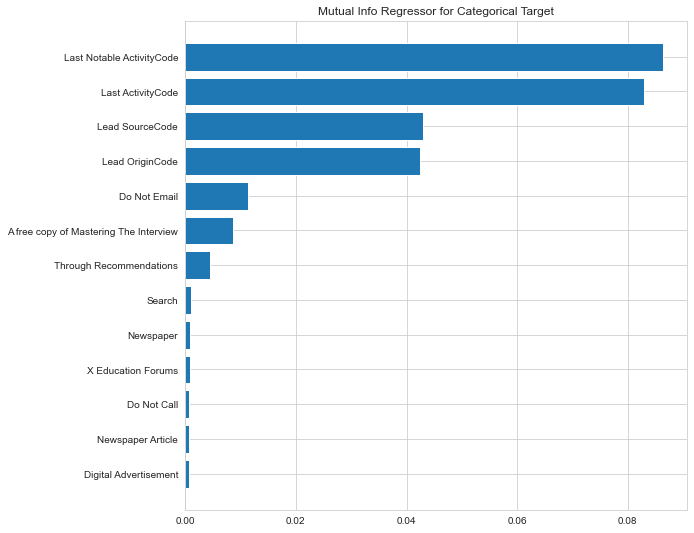

In [492]:
plt.figure(figsize = (9,9))
plot_mi_ca(mi_scores)

In [493]:
indie = mi_scores[mi_scores>0.03].index # selecting an arbitrary cutoff

In [494]:
indie = list(indie) # preparing a list of variables for the model

indie_vars = []

for var in indie:
    if var in catfactorized:
        indie_vars.append(var[:-4]) # we don't want the factorized versions
    else:
        indie_vars.append(var)
        
# we are only factorizing variable with more than 10 levels

In [495]:
indie_vars

['Last Notable ActivityCode',
 'Last ActivityCode',
 'Lead SourceCode',
 'Lead Origin']

In [496]:


for var in catfactorized:
    df2.drop(var, axis = 1, inplace = True)
    
    # we don't need to factorize these variables
    # we will dummy encode these insead. 

### 2.2 RFE scores

In [497]:
varlist = vardefiner(df2)
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]
int_vars

['Lead Number', 'Total Time Spent on Website']

In [498]:
float_vars

['TotalVisits',
 'Page Views Per Visit',
 'Lead SourceCode',
 'Last ActivityCode',
 'Last Notable ActivityCode']

In [499]:
float_vars.remove('Last ActivityCode')
float_vars.remove('Last Notable ActivityCode')
float_vars.remove('Lead SourceCode')  # these are not numeric types

In [500]:
import sklearn
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [501]:
lscaler = MinMaxScaler()

df[int_vars+float_vars] = lscaler.fit_transform(df[int_vars+float_vars]) # scaling the numeric types

In [502]:
X1 = df[int_vars+float_vars]
X1.drop('Lead Number', axis = 1, inplace = True)

In [503]:
lm = LogisticRegression() # specifying the model
lm.fit(X1, y)

rfe = RFE(estimator = LogisticRegression(), n_features_to_select =2 , verbose =3)             
rfe = rfe.fit(X1, y)

Fitting estimator with 3 features.


In [504]:
list(zip(X1.columns,rfe.support_,rfe.ranking_)) 

[('Total Time Spent on Website', True, 1),
 ('TotalVisits', False, 2),
 ('Page Views Per Visit', True, 1)]

In [505]:
col = X1.columns[rfe.support_]  # columns with RFE support

In [506]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [507]:
for var in col:
    indie_vars.append(var) # appending these variables to the list we want to build the model with

In [508]:

indie_vars

['Last Notable ActivityCode',
 'Last ActivityCode',
 'Lead SourceCode',
 'Lead Origin',
 'Total Time Spent on Website',
 'Page Views Per Visit']

### 1.2 Visualizations

In [509]:
indie_vars = list(set(indie_vars)) # we only want the unique ones

In [510]:
df_a = anlsys[['Page Views Per Visit', 'Last Notable Activity', 'Lead Source', 'Lead Origin', 'Last Activity', 'Total Time Spent on Website', 'Converted']]

In [511]:
import matplotlib.pyplot as plt
import seaborn as sns

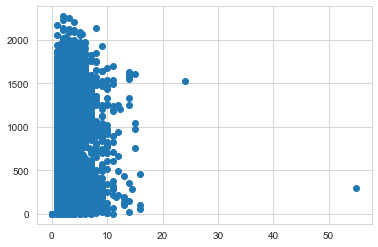

In [512]:
plt.scatter(df_a['Page Views Per Visit'], df_a['Total Time Spent on Website'])
plt.show()


# most people spending a lot of time on the website don't visit more than 10 pages per visit

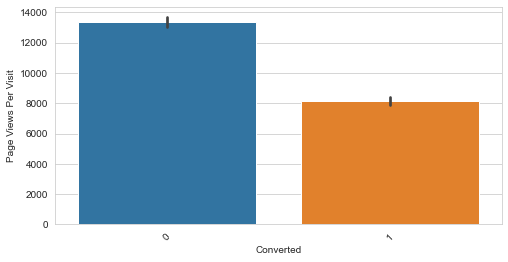

In [513]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_a, x="Converted", y="Page Views Per Visit", estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

# target people visit less number of pages per visit

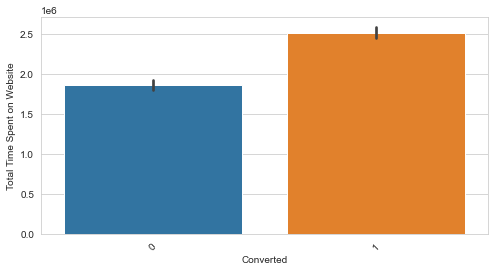

In [514]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_a, x="Converted", y="Total Time Spent on Website", estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

# target people spend more time on the website

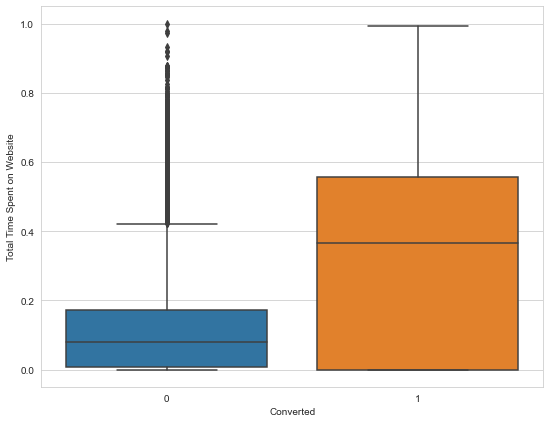

In [515]:
plt.figure(figsize=[9,7])
sns.boxplot(df['Converted'], df['Total Time Spent on Website'])
plt.show()

# there are a group of people who spend a lot of time, but do not opt for the course

In [516]:
df_a['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [517]:
df_t = df_a[(df_a['Page Views Per Visit']>5)&(df_a['Page Views Per Visit']<20)]
df_t1 = df_a[df_a['Page Views Per Visit']<=5]

# let's see who these people are

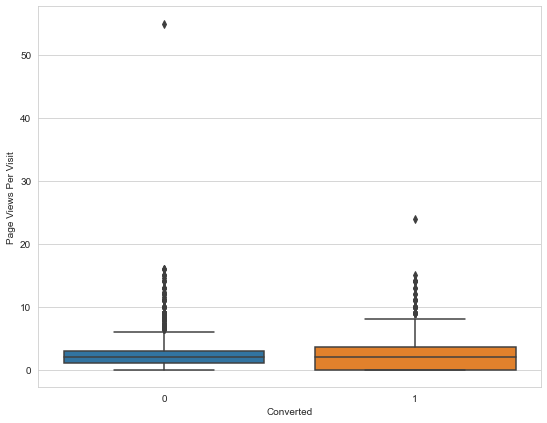

In [518]:
plt.figure(figsize=[9,7])
sns.boxplot(df_a['Converted'], df_a['Page Views Per Visit'])
plt.show()

# people who visit more pages per visit have a higher chance of getting converted

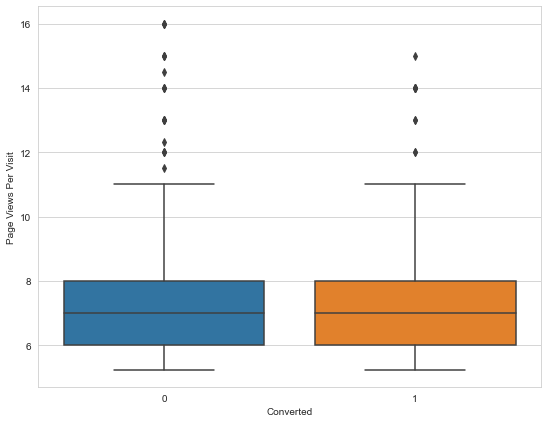

In [519]:
plt.figure(figsize=[9,7])
sns.boxplot(df_t['Converted'], df_t['Page Views Per Visit'])
plt.show()

# people who visit >5 pages per visit

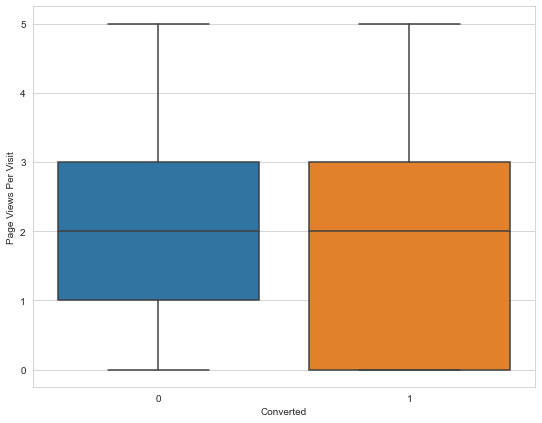

In [520]:
plt.figure(figsize=[9,7])
sns.boxplot(df_t1['Converted'], df_t1['Page Views Per Visit'])
plt.show()

# people who visit >5 pages per visit

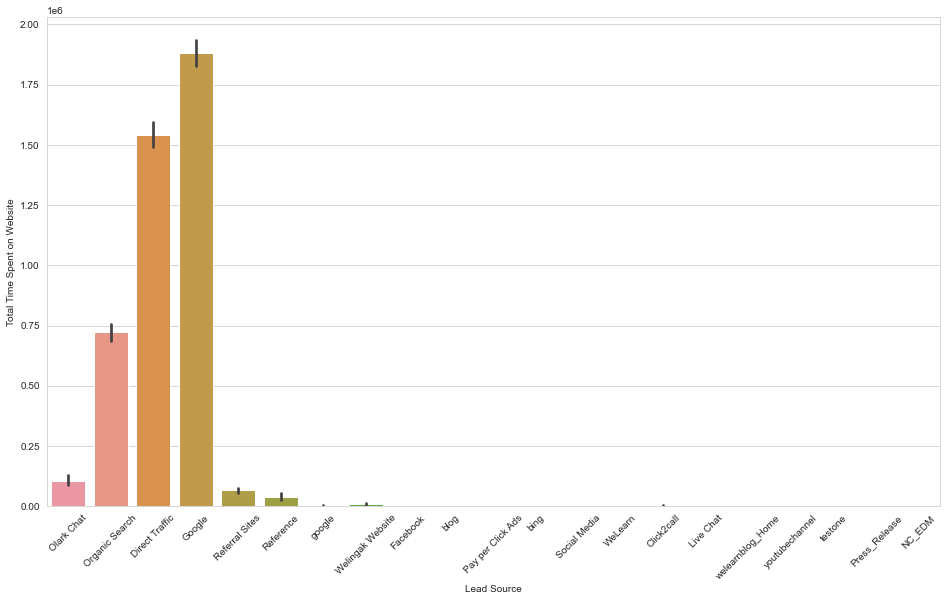

In [521]:
plt.figure(figsize=(16,9))
sns.barplot(data=df_a, x="Lead Source", y="Total Time Spent on Website", estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

# These lead sources bring most traffic to the website

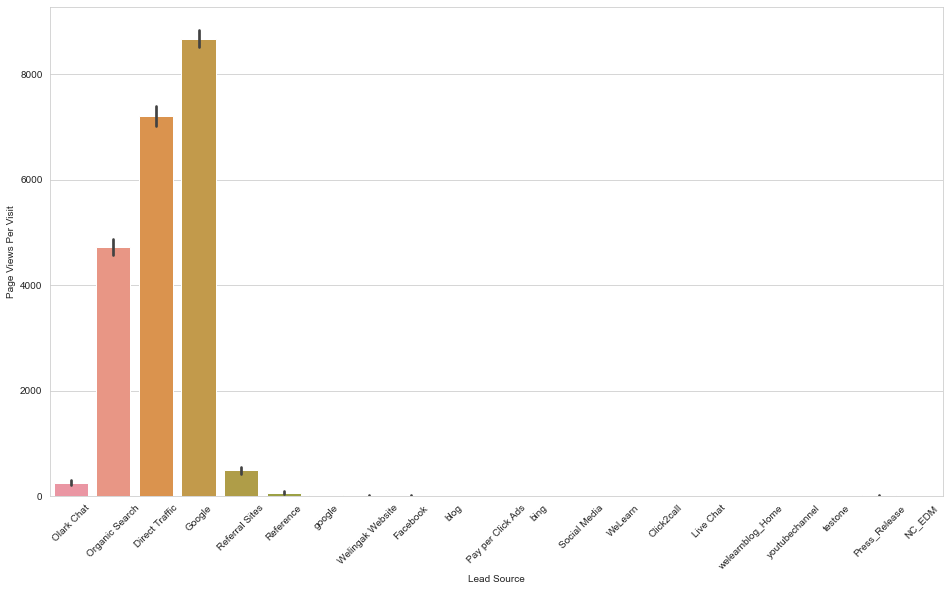

In [522]:
plt.figure(figsize=(16,9))
sns.barplot(data=df_a, x="Lead Source", y="Page Views Per Visit", estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

# and they show similar trend over the number of page visited per visit

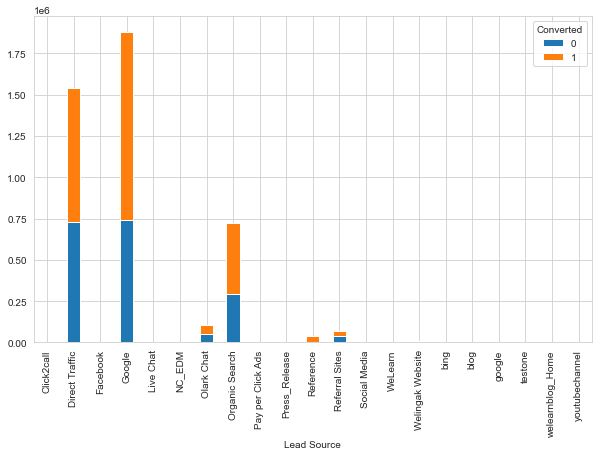

In [523]:
monthly = pd.pivot_table(data=df_a, values="Total Time Spent on Website", index="Lead Source", columns="Converted", aggfunc=sum)
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

# next we stacks the ration of conversion on top of that.
# more traffic means higher chances of conversion

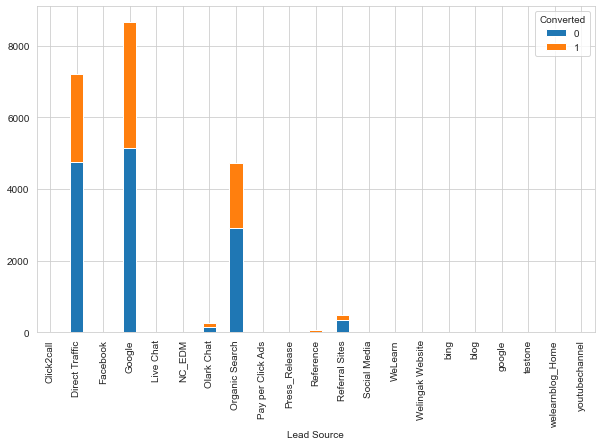

In [574]:
monthly = pd.pivot_table(data=df_a, values="Page Views Per Visit", index="Lead Source", columns="Converted", aggfunc=sum)
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

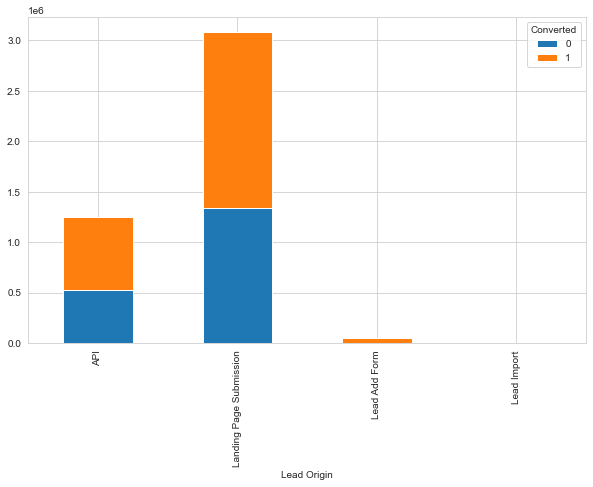

In [524]:
monthly = pd.pivot_table(data=df_a, values="Total Time Spent on Website", index="Lead Origin", columns="Converted", aggfunc=sum)
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

# Lead origin levels with their conversion ratio, with time spent on website as values

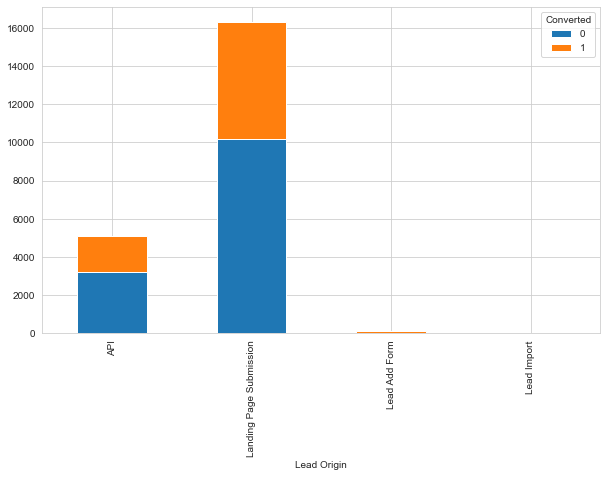

In [525]:
monthly = pd.pivot_table(data=df_a, values="Page Views Per Visit", index="Lead Origin", columns="Converted", aggfunc=sum)
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

# Lead origin levels with their conversion ratio, with page views per visit as values

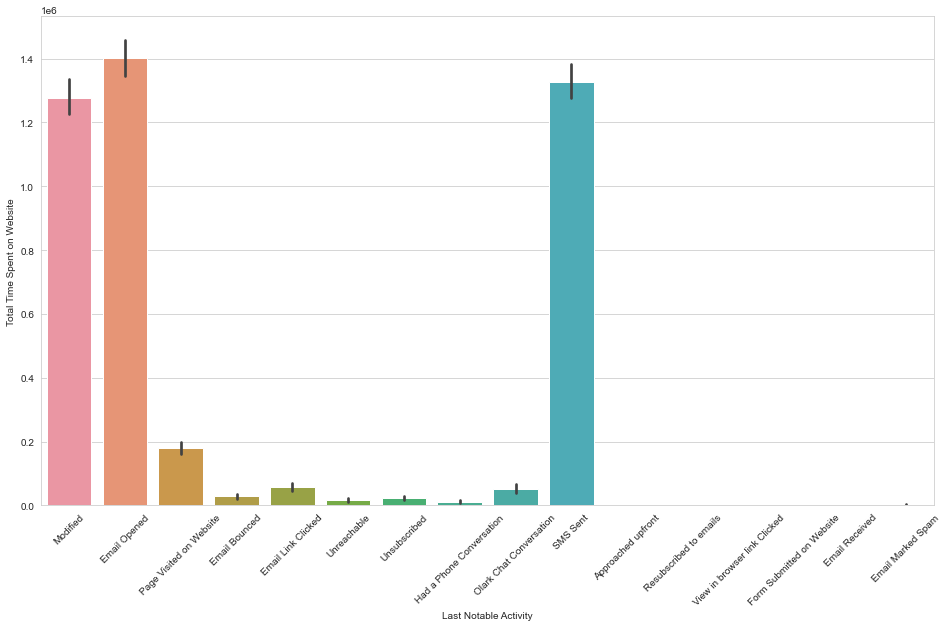

In [526]:
plt.figure(figsize=(16,9))
sns.barplot(data=df_a, x="Last Notable Activity", y="Total Time Spent on Website", estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

# last notable activity distribution of the total traffic

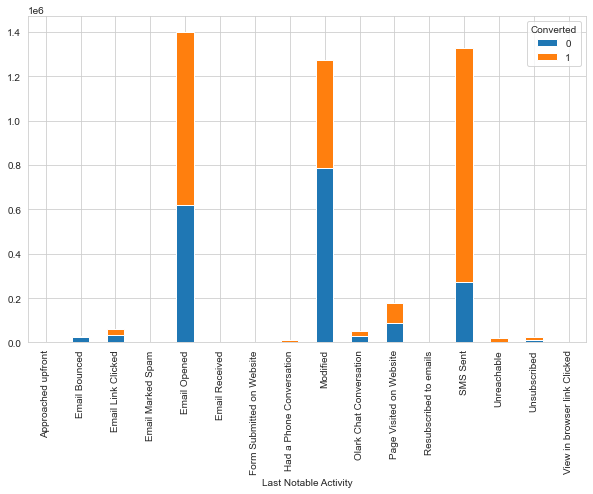

In [527]:
monthly = pd.pivot_table(data=df_a, values="Total Time Spent on Website", index="Last Notable Activity", columns="Converted", aggfunc=sum)
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

# Notable activities that lead to higher chances of conversion, and how much time they spent on the website

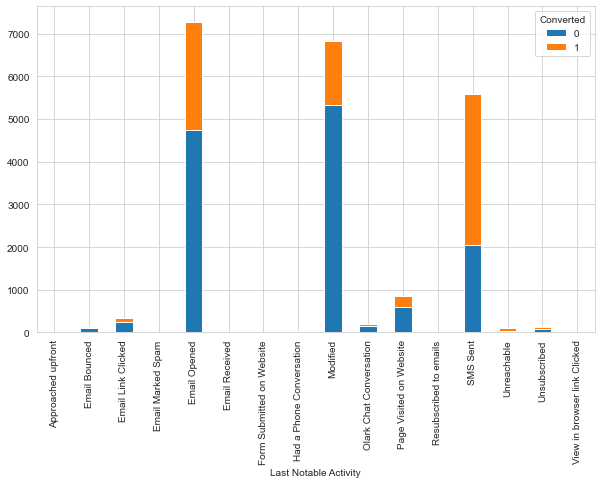

In [528]:
monthly = pd.pivot_table(data=df_a, values="Page Views Per Visit", index="Last Notable Activity", columns="Converted", aggfunc=sum)
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

# Notable activities that lead to higher chances of conversion, depending on how many pages these leads visit each time

### 1.3 Dummy Preparation

In [529]:
df_l = df1[indie_vars] # dataframe for the model

In [530]:
df_l

,Last Notable ActivityCode,Lead Origin,Page Views Per Visit,Last ActivityCode,Total Time Spent on Website,Lead SourceCode
0,0,API,0.00,0,0,0
1,1,API,2.50,1,674,1
2,1,Landing Page Submission,2.00,1,1532,2
3,0,Landing Page Submission,1.00,2,305,2
4,0,Landing Page Submission,1.00,3,1428,3
...,...,...,...,...,...,...
9235,15,Landing Page Submission,2.67,16,1845,2
9236,9,Landing Page Submission,2.00,11,238,2
9237,9,Landing Page Submission,2.00,11,199,2
9238,9,Landing Page Submission,3.00,11,499,3


In [531]:
varlist = vardefiner(df_l)
cat_vars = varlist[1]

In [532]:
def gettingdummies(df0,row):
    for item in row:
        dummy = pd.get_dummies(df0[item], drop_first = True).rename(columns = lambda x: item+'_'+str(x))
        df0 = pd.concat([df0, dummy], axis = 1)
        df0.drop([item], axis = 1, inplace = True)
    return df0
            # a function for dummy encoding

In [533]:
df_l = gettingdummies(df_l,cat_vars) # getting dummies

In [534]:
df_l

,Last Notable ActivityCode,Page Views Per Visit,Last ActivityCode,Total Time Spent on Website,Lead SourceCode,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0.00,0,0,0,0,0,0
1,1,2.50,1,674,1,0,0,0
2,1,2.00,1,1532,2,1,0,0
3,0,1.00,2,305,2,1,0,0
4,0,1.00,3,1428,3,1,0,0
...,...,...,...,...,...,...,...,...
9235,15,2.67,16,1845,2,1,0,0
9236,9,2.00,11,238,2,1,0,0
9237,9,2.00,11,199,2,1,0,0
9238,9,3.00,11,499,3,1,0,0


In [535]:

Xa = df_l # specifying the X, we have already specified y

## 3. Model Building

In [536]:
from sklearn.model_selection import train_test_split # splitting the data

X_train, X_test, y_train, y_test = train_test_split(Xa, y, train_size=0.8, test_size=0.2, random_state=100)

In [537]:
col = list(col)

# col.remove('Lead SourceCode') # this is not a numeric variable

In [538]:
col

['Total Time Spent on Website', 'Page Views Per Visit']

In [539]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[col] = scaler.fit_transform(X_train[col])

In [540]:
y_train

160     1
2267    0
8895    1
854     1
3640    0
       ..
367     0
82      1
8199    0
7077    0
5754    0
Name: Converted, Length: 7259, dtype: int64

In [541]:
import statsmodels.api as sm

In [542]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [543]:
X_train_sm = sm.add_constant(X_train)
log = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7250
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3446.6
Date:                Thu, 29 Dec 2022   Deviance:                       6893.3
Time:                        10:39:43   Pearson chi2:                 7.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3156
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1022      0.072    -15.338      0.000      -1.243      -0.961
Last Notable ActivityCode               0.1860      0.012     15.680      0.000       0.163       0.209
Page Views Per Visit                   -0.0549      0.036     -1.539      0.124      -0.125       0.015
Last ActivityCode                       0.0091      0.010      0.909      0.363      -0.011       0.029
Total Time Spent on Website             1.0551      0.034     31.155      0.000       0.989       1.122
Lead SourceCode                        -0.0507      0.027     -1.880      0.060      -0.103       0.002
Lead Origin_Landing Page Submission    -0.3876      0.071     -5.449      0.000      -0.527      -0.248
Lead Origin_Lead Add Form               4.1684      0.230     18.107      0.000       3.717       4.620
Lead Origin_Lead Import                 1.5270      0.461      3.310      0.001       0.623       2.431
=======================================================================================================
"""

In [544]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  # But they do not have a high VIF score

,Features,VIF
2,Last ActivityCode,4.31
4,Lead SourceCode,3.76
0,Last Notable ActivityCode,3.52
5,Lead Origin_Landing Page Submission,2.63
6,Lead Origin_Lead Add Form,2.13
1,Page Views Per Visit,1.35
3,Total Time Spent on Website,1.18
7,Lead Origin_Lead Import,1.13


In [545]:
y_train_pred = pd.DataFrame(res.predict(X_train_sm))

In [546]:
y_train = pd.DataFrame(y_train)

In [547]:
y_train_pred_df = pd.DataFrame(y_train_pred)

In [548]:
y_train1 = y_train.copy()
y_train1['Churn_Prob'] = y_train_pred # adding the churn probability to the dataframe

In [549]:
y_train1

,Converted,Churn_Prob
160,1,0.401859
2267,0,0.388974
8895,1,0.449724
854,1,0.704011
3640,0,0.116810
...,...,...
367,0,0.321517
82,1,0.235545
8199,0,0.976185
7077,0,0.173014


In [550]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train1[i]= y_train1['Churn_Prob'].map(lambda x: 1 if x > i else 0)
y_train1.head()       # results for different cutoffs

,Converted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
160,1,0.401859,1,1,1,1,1,0,0,0,0,0
2267,0,0.388974,1,1,1,1,0,0,0,0,0,0
8895,1,0.449724,1,1,1,1,1,0,0,0,0,0
854,1,0.704011,1,1,1,1,1,1,1,1,0,0
3640,0,0.116810,1,1,0,0,0,0,0,0,0,0


In [551]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num: # looping through these different cutoffs
    cm1 = metrics.confusion_matrix(y_train.Converted, y_train1[i] ) # confusion maatrix
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 # accuracy
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1]) # specificity
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1]) # sensitivity
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci] # cut-off
print(cutoff_df) 

     prob  accuracy     sensi     speci
0.0   0.0  0.380769  1.000000  0.000000
0.1   0.1  0.442623  0.985528  0.108788
0.2   0.2  0.725582  0.869754  0.636930
0.3   0.3  0.761537  0.830680  0.719021
0.4   0.4  0.784130  0.745297  0.808009
0.5   0.5  0.770905  0.590087  0.882091
0.6   0.6  0.762639  0.504342  0.921468
0.7   0.7  0.748726  0.421129  0.950167
0.8   0.8  0.729853  0.336831  0.971524
0.9   0.9  0.669651  0.148698  0.989989


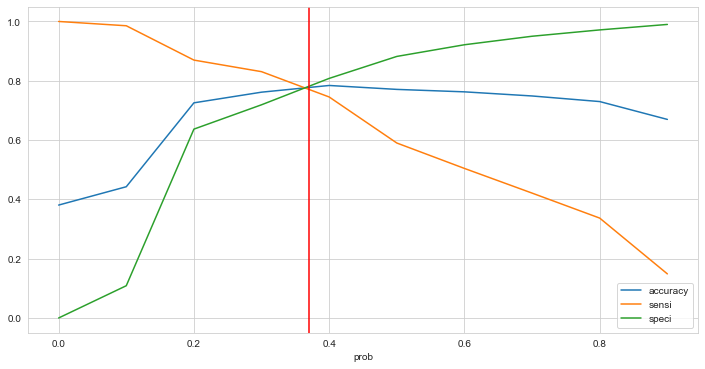

In [552]:
import seaborn as sns
sns.set_style('whitegrid') # plotting the respective sensitivities, accuracies, and specificities
%matplotlib inline
cutoff_df.plot.line( x='prob', y=['accuracy','sensi','speci'], figsize = (12,6))
plt.axvline(x = 0.37, color = 'r', linestyle = '-')
plt.show()  # the vertical line took some trial and error

In [553]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False ) # false positive rate, true positive rate
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(4, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [554]:
fpr, tpr, thresholds = metrics.roc_curve( y_train1.Converted, y_train1.Churn_Prob, drop_intermediate = False )

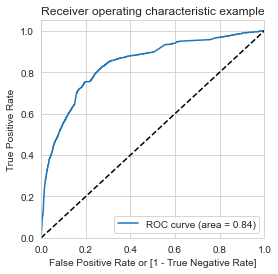

In [555]:
draw_roc(y_train1.Converted, y_train1.Churn_Prob)

# this is a farely good roc curve

In [556]:
y_train1['predicted'] = y_train1.Churn_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train1.head() # applying cutoff based on accuracy, sensitivity, and specificity

,Converted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
160,1,0.401859,1,1,1,1,1,0,0,0,0,0,1
2267,0,0.388974,1,1,1,1,0,0,0,0,0,0,1
8895,1,0.449724,1,1,1,1,1,0,0,0,0,0,1
854,1,0.704011,1,1,1,1,1,1,1,1,0,0,1
3640,0,0.116810,1,1,0,0,0,0,0,0,0,0,0


In [557]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train1.Converted, y_train1.Churn_Prob) # precision and recall

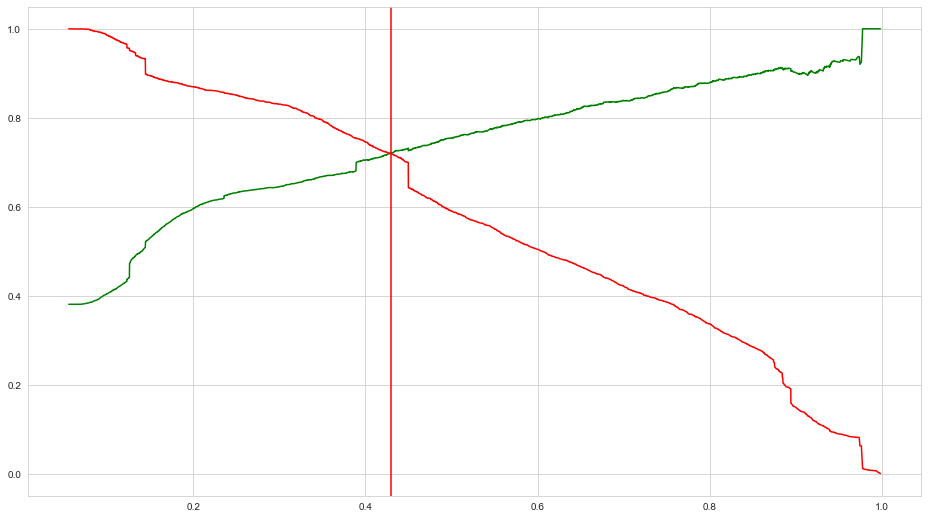

In [558]:
plt.figure(figsize=(16,9))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x = 0.43, color = 'r', linestyle = '-') # the second cut-off
plt.show()

In [559]:
y_train1['predicted2'] = y_train1.Churn_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_train1.head() # results based on second cut-off

,Converted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,predicted2
160,1,0.401859,1,1,1,1,1,0,0,0,0,0,1,0
2267,0,0.388974,1,1,1,1,0,0,0,0,0,0,1,0
8895,1,0.449724,1,1,1,1,1,0,0,0,0,0,1,1
854,1,0.704011,1,1,1,1,1,1,1,1,0,0,1,1
3640,0,0.116810,1,1,0,0,0,0,0,0,0,0,0,0


In [560]:
from sklearn.metrics import accuracy_score, classification_report

### 3.1 Model Evaluation

In [561]:
lx = ['predicted', 'predicted2']
i = 1
print('model scores:')
for var in lx:
    print('scores for cut-off{}'.format(i))
    print('accuracy score: {}'.format(accuracy_score(y_train1.Converted, y_train1[var])*100))
    print(classification_report(y_train1.Converted, y_train1[var]))
    print('-'*50)
    i = i+1

model scores:
scores for cut-off1
accuracy score: 77.09050833448133
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4495
           1       0.67      0.77      0.72      2764

    accuracy                           0.77      7259
   macro avg       0.76      0.77      0.76      7259
weighted avg       0.78      0.77      0.77      7259

--------------------------------------------------
scores for cut-off2
accuracy score: 78.70230059236809
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4495
           1       0.72      0.72      0.72      2764

    accuracy                           0.79      7259
   macro avg       0.77      0.77      0.77      7259
weighted avg       0.79      0.79      0.79      7259

--------------------------------------------------


## 4. Predictions on The test set

In [562]:
X_test[col] = scaler.transform(X_test[col]) # repating the same steps for test dataset

In [563]:
X_test_sm = sm.add_constant(X_test)

In [564]:
y_test_pred = res.predict(X_test_sm)

In [565]:
y_test_pred = pd.DataFrame(y_test_pred) # prediction dataset for the test set

In [566]:
y_test_pred['Converted'] = y_test
y_test_pred.rename(columns = {0: 'Churn_Prob'}, inplace = True) # renaming the probability column

In [567]:
y_test_pred['predicted'] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.37 else 0) # applying first cut-off
y_test_pred['predicted2'] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.43 else 0) # applying second cut-off
y_test_pred.head()

,Churn_Prob,Converted,predicted,predicted2
3271,0.150089,0,0,0
1490,0.627465,1,1,1
7936,0.136812,0,0,0
4216,0.875268,1,1,1
3830,0.108043,0,0,0


In [568]:
lx = ['predicted', 'predicted2']
i = 1
print('model scores:')
for var in lx:
    print('scores for cut-off{}'.format(i))
    print('accuracy score: {}'.format(accuracy_score(y_test_pred.Converted, y_test_pred[var])*100))
    print(classification_report(y_test_pred.Converted, y_test_pred[var]))
    print('-'*50)
    i = i+1

model scores:
scores for cut-off1
accuracy score: 77.1900826446281
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1144
           1       0.67      0.76      0.71       671

    accuracy                           0.77      1815
   macro avg       0.76      0.77      0.76      1815
weighted avg       0.78      0.77      0.77      1815

--------------------------------------------------
scores for cut-off2
accuracy score: 78.56749311294766
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1144
           1       0.71      0.70      0.71       671

    accuracy                           0.79      1815
   macro avg       0.77      0.77      0.77      1815
weighted avg       0.78      0.79      0.79      1815

--------------------------------------------------


In [569]:
confusion1 = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.predicted ) # confusion matrix for first cutoff
confusion2 = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.predicted2) # confusion matrixxx for second cutoff

In [570]:
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives
                                           # first cut-off
senx = TP1 / float(TP1+FN1)
spefx = TN1 / float(TN1+FP1)
FPRx = 1 - spefx
precision1 = TP1/float(TP1+FP1)
                                        

In [571]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives
                                           # second cuto_off
seny = TP2 / float(TP2+FN2)
spefy = TN2 / float(TN2+FP2)
FPRy = 1 - spefy
precision2 = TP2/float(TP2+FP2)

In [572]:
# printing the different scores


print('Recall, True Positive Rate, and Sensitivity of cutoff 1\n    {}'.format(senx))
print('specificity of the model\n    {}'.format(spefx))
print('False Positive Rate\n    {}'.format(FPRx))
print('Precision of the model\n    {}    '.format(precision1))
print('-'*50)
print('Recall, True Positive Rate, and Sensitivity of cutoff 2\n    {}'.format(seny))
print('specificity of the model\n    {}'.format(spefy))
print('False Positive Rate\n    {}'.format(FPRy))
print('Precision of the model\n    {}    '.format(precision2))
print('-'*50)

Recall, True Positive Rate, and Sensitivity of cutoff 1
    0.7630402384500745
specificity of the model
    0.7770979020979021
False Positive Rate
    0.22290209790209792
Precision of the model
    0.6675358539765319    
--------------------------------------------------
Recall, True Positive Rate, and Sensitivity of cutoff 2
    0.7004470938897168
specificity of the model
    0.8356643356643356
False Positive Rate
    0.16433566433566438
Precision of the model
    0.7142857142857143    
--------------------------------------------------


#### The second cutoff performs better on the test set, although their performance on the train set is pretty similar